<a href="https://colab.research.google.com/github/Taiba528/My-Python-World/blob/master/LSTMSpamCLassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
# load dataset
from google.colab import files
uploaded = files.upload()

Saving sms.csv to sms.csv


In [0]:
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded['sms.csv'].decode("ISO-8859-1")))

In [5]:
df.head()

,Message,Class_Label,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,'Go until jurong point,ham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,'Ok lar... Joking wif u oni...',ham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'U dun say so early hor... U c already then sa...,ham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,'Nah I don\'t think he goes to usf,ham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    Message     200 non-null    object
 1   Class_Label  200 non-null    object
 2   Unnamed: 5   1 non-null      object
 3   Unnamed: 6   1 non-null      object
 4   Unnamed: 7   1 non-null      object
 5   Unnamed: 8   1 non-null      object
 6   Unnamed: 9   1 non-null      object
 7   Unnamed: 10  1 non-null      object
dtypes: object(8)
memory usage: 12.6+ KB


Text(0.5, 1.0, 'Number of ham and spam messages')

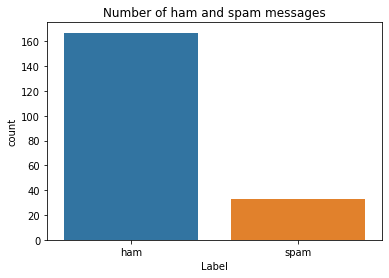

In [9]:
sns.countplot(df['Class_Label'])
plt.xlabel('Label')
plt.title('Number of ham and spam messages')



In [0]:
X = df[' Message']
Y = df['Class_Label']
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [0]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [0]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [20]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [21]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 112 samples, validate on 28 samples
Epoch 1/10
112/112 [==============================] - 1s 8ms/step - loss: 0.6912 - accuracy: 0.7589 - val_loss: 0.6726 - val_accuracy: 0.7857
Epoch 2/10
112/112 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.8571 - val_loss: 0.6400 - val_accuracy: 0.7857
Epoch 3/10
112/112 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.8571 - val_loss: 0.5523 - val_accuracy: 0.7857
Epoch 4/10
112/112 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.8571 - val_loss: 0.5512 - val_accuracy: 0.7857
Epoch 5/10
112/112 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8571 - val_loss: 0.4912 - val_accuracy: 0.7857
Epoch 6/10
112/112 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.8571 - val_loss: 0.4834 - val_accuracy: 0.7857
Epoch 7/10
112/112 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8571 - v

In [0]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [23]:
accr = model.evaluate(test_sequences_matrix,Y_test)

60/60 [==============================] - 0s 800us/step


In [24]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.482
  Accuracy: 0.817
